<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Univariate-analysis" data-toc-modified-id="Univariate-analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Univariate analysis</a></span></li><li><span><a href="#Bivariate-analysis" data-toc-modified-id="Bivariate-analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Bivariate analysis</a></span></li><li><span><a href="#Multi-variate-analysis" data-toc-modified-id="Multi-variate-analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Multi-variate analysis</a></span></li></ul></li><li><span><a href="#Model-building" data-toc-modified-id="Model-building-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model building</a></span><ul class="toc-item"><li><span><a href="#Using-sklearn" data-toc-modified-id="Using-sklearn-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Using sklearn</a></span></li><li><span><a href="#Using-tensorflow" data-toc-modified-id="Using-tensorflow-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Using tensorflow</a></span></li><li><span><a href="#Feature-Extraction-using-PCA" data-toc-modified-id="Feature-Extraction-using-PCA-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Feature Extraction using PCA</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Objective

To classify data-points in classes Iris-Setosa, Iris-Versicolor, Iris-Virginica

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

sns.set_style("darkgrid")
%matplotlib inline

In [0]:
from sklearn.datasets import load_iris

data = load_iris()
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

feature_set = pd.DataFrame(data.data, columns=cols)

species = pd.Series(data.target, name="species").map({
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
})


iris_data = pd.merge(feature_set, species, left_index=True, right_index=True)

In [0]:
# iris_data = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
# iris_data.head()

# Exploratory data analysis

In [4]:
# print a concise summary of a DataFrame.

iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Generate descriptive statistics.
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.

iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


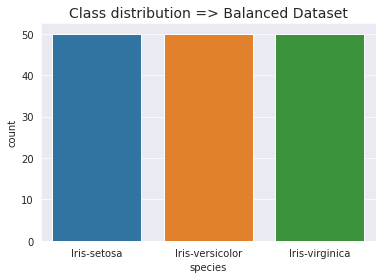

In [6]:
# check class distribution

_ = sns.countplot(iris_data.species)
_ = plt.title("Class distribution => Balanced Dataset", fontsize=14)

## Univariate analysis

In [0]:
iris_setosa = iris_data.loc[iris_data.species == "Iris-setosa"]
iris_versicolor = iris_data.loc[iris_data.species == "Iris-versicolor"]
iris_virginica = iris_data.loc[iris_data.species == "Iris-virginica"]

Now, 
* Mean, Variance and Std. Devitaion values can easily be corrupter by a single extreme outlier
* To overcome these, we can use Median, Percentile, Quantile, IQR, MAD

In [8]:
print("Setosa mean: ", np.mean(iris_setosa['petal_length']))
print("Setosa corrupted mean: ", np.mean(np.append(iris_setosa['petal_length'], 50)))
print("versicolor mean: ", np.mean(iris_versicolor['petal_length']))
print("virginica mean: ",  np.mean(iris_virginica['petal_length']))
print()
print("Setosa variance: ", np.var(iris_setosa['petal_length']))
print("Setosa corrupted variance: ", np.var(np.append(iris_setosa['petal_length'], 50)))
print("versicolor variance: ", np.var(iris_versicolor['petal_length']))
print("virginica variance: ", np.var(iris_virginica['petal_length']))
print() 
print("Setosa std: ", np.std(iris_setosa['petal_length']))
print("Setosa corrupted std: ", np.std(np.append(iris_setosa['petal_length'], 50)))
print("versicolor std: ", np.std(iris_versicolor['petal_length']))
print("virginica std: ", np.std(iris_virginica['petal_length']))

Setosa mean:  1.4620000000000002
Setosa corrupted mean:  2.4137254901960787
versicolor mean:  4.26
virginica mean:  5.552

Setosa variance:  0.02955600000000001
Setosa corrupted variance:  45.31804690503652
versicolor variance:  0.21640000000000012
virginica variance:  0.2984960000000002

Setosa std:  0.17191858538273286
Setosa corrupted std:  6.731868010072429
versicolor std:  0.4651881339845204
virginica std:  0.5463478745268441


* Percentiles go from 0 to 100.
* Quartiles go from 1 to 4 (or 0 to 4).
* Quantiles can go from anything to anything.
* Percentiles and quartiles are examples of quantiles.


* 0 quartile = 0 quantile = 0 percentile
* 1 quartile = 0.25 quantile = 25 percentile
* 2 quartile = .5 quantile = 50 percentile (median)
* 3 quartile = .75 quantile = 75 percentile
* 4 quartile = 1 quantile = 100 percentile

In [9]:
print("Median: ")
print("Setosa Median: ", np.median(iris_setosa['petal_length']))
print("Setosa corrupted Median: ", np.median(np.append(iris_setosa['petal_length'], 50)))
print("versicolor Median: ", np.median(iris_versicolor['petal_length']))
print("virginica Median: ",  np.median(iris_virginica['petal_length']))

print("\nQuantiles: [0, 25, 50, 75]")
print("Setosa Quantile: ", np.percentile(iris_setosa['petal_length'], np.arange(0, 100, 25)))
print("Setosa corrupted Quantile: ", np.percentile(np.append(iris_setosa['petal_length'], 50), np.arange(0, 100, 25)))
print("versicolor Quantile: ", np.percentile(iris_versicolor['petal_length'], np.arange(0, 100, 25)))
print("virginica Quantile: ", np.percentile(iris_virginica['petal_length'], np.arange(0, 100, 25)))

print("\n90th Percentiles")
print("Setosa Percentile: ", np.percentile(iris_setosa['petal_length'], 90))
print("Setosa corrupted Percentile: ", np.percentile(np.append(iris_setosa['petal_length'], 50), 90))
print("versicolor Percentile: ", np.percentile(iris_versicolor['petal_length'], 90))
print("virginica Percentile: ", np.percentile(iris_virginica['petal_length'], 90))

from statsmodels import robust
print("\nMedian Absolute Deviation")
print("Setosa MAD: ", robust.mad(iris_setosa['petal_length']))
print("Setosa corrupted MAD: ", robust.mad(np.append(iris_setosa['petal_length'], 50)))
print("versicolor MAD: ", robust.mad(iris_versicolor['petal_length']))
print("virginica MAD: ", robust.mad(iris_virginica['petal_length']))

Median: 
Setosa Median:  1.5
Setosa corrupted Median:  1.5
versicolor Median:  4.35
virginica Median:  5.55

Quantiles: [0, 25, 50, 75]
Setosa Quantile:  [1.    1.4   1.5   1.575]
Setosa corrupted Quantile:  [1.  1.4 1.5 1.6]
versicolor Quantile:  [3.   4.   4.35 4.6 ]
virginica Quantile:  [4.5   5.1   5.55  5.875]

90th Percentiles
Setosa Percentile:  1.7
Setosa corrupted Percentile:  1.7
versicolor Percentile:  4.8
virginica Percentile:  6.3100000000000005

Median Absolute Deviation
Setosa MAD:  0.14826022185056031
Setosa corrupted MAD:  0.14826022185056031
versicolor MAD:  0.5189107764769602
virginica MAD:  0.6671709983275211


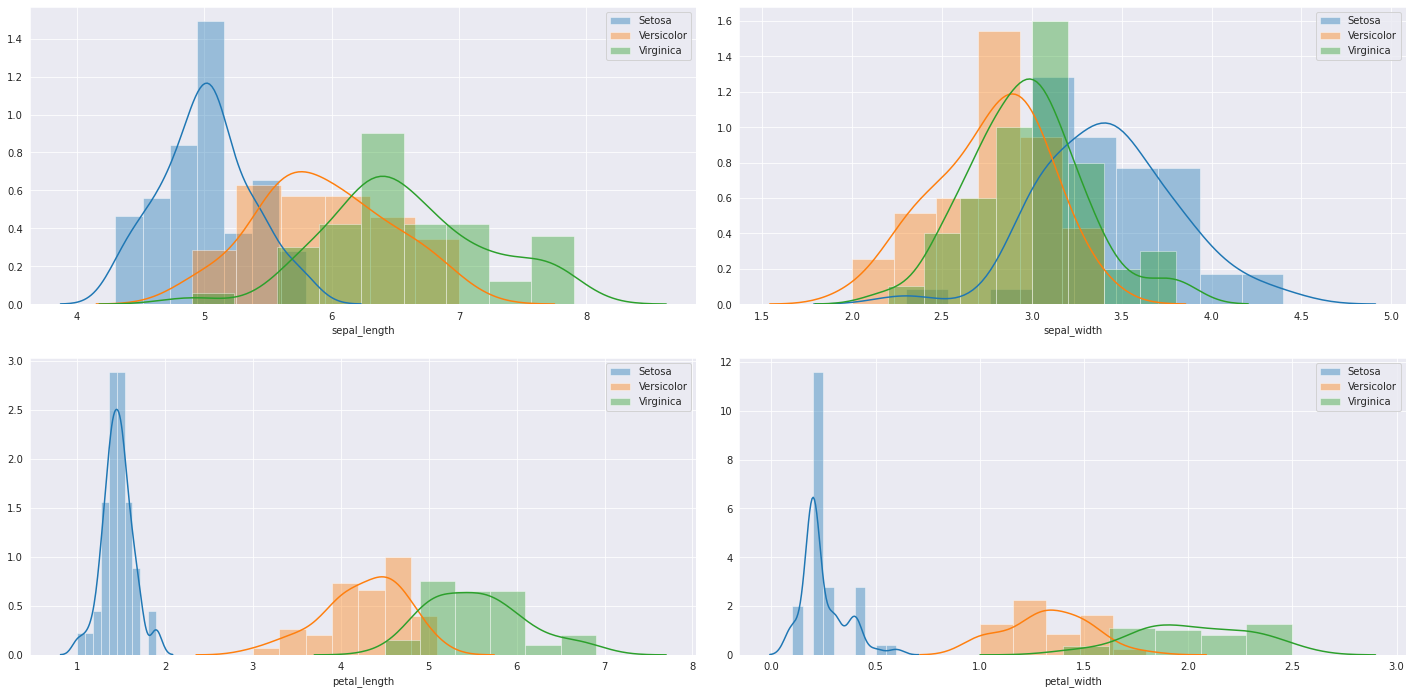

In [10]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for no, column in enumerate(iris_data.columns[:-1], 1):
    ax = fig.add_subplot(2, 2, no)
    sns.distplot(iris_data.loc[iris_data.species == 'Iris-setosa', f"{column}"], label="Setosa")
    sns.distplot(iris_data.loc[iris_data.species == 'Iris-versicolor', f"{column}"], label="Versicolor")
    sns.distplot(iris_data.loc[iris_data.species == 'Iris-virginica', f"{column}"], label="Virginica")
    ax.legend()

plt.tight_layout(pad=2.0)
plt.show()

Using distplot we can clearly see that
* petal_length and petal_width has the best value seperation among different classses
* sepal_length and sepal_width are scary to look at as there is so much overlapping between differnt classes
* feature petal_length >(better than) petal_width > sepal_length > sepal_width

Usage of PDF's and CDF's

PDF:  [0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
CDF:  [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


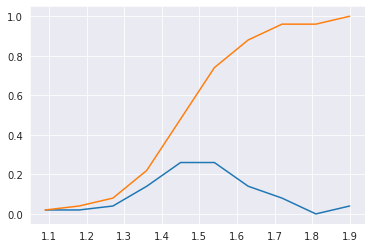

In [11]:
counts, bin_edges = np.histogram(iris_data.loc[iris_data.species == 'Iris-setosa', 'petal_length'],
                                bins=10, density=True)

pdf = counts/sum(counts)
print("PDF: ", pdf)
print("CDF: ", bin_edges)

# cdf 
cdf = np.cumsum(pdf)
_ = plt.plot(bin_edges[1:], pdf)
_ = plt.plot(bin_edges[1:], cdf)

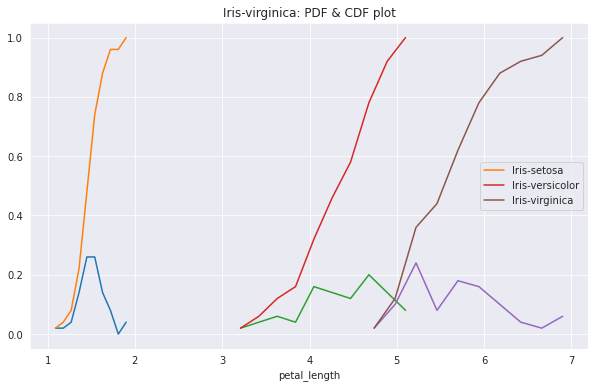

In [12]:
fig = plt.figure(figsize=(10, 6))

for i, cls in enumerate(iris_data.species.unique(), 1):
    counts, bin_edges = np.histogram(iris_data.loc[iris_data.species == f'{cls}', 'petal_length'],
                                    bins=10, density=True)

    pdf = counts/sum(counts)
    # print("PDF: ", pdf)
    # print("CDF: ", bin_edges)

    # cdf 
    cdf = np.cumsum(pdf)
    _ = plt.plot(bin_edges[1:], pdf)
    _ = plt.plot(bin_edges[1:], cdf, label=f'{cls}')

plt.title(f"{cls}: PDF & CDF plot")
plt.xlabel("petal_length")
plt.legend()
plt.show()

Using the Cumulative density function
* We can see using a simple if-else statement we can seperate differnt classes efficiently.
* For eg. using setting *petal_length < 2*, we can differntiate between Iris-setosa and other classes easilt
* Setting petal_length in the interval between *>2 and <=5* we can seperate out Iris-versicolor from Iris-setosa and virginica with accuracy of around 95%; as the CDF value at 5 is 0.95.

* If we set *petal_length > 5*, we can classify Iris-virginica correctly most of the time



Box Plots
* [Khan academy](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review)

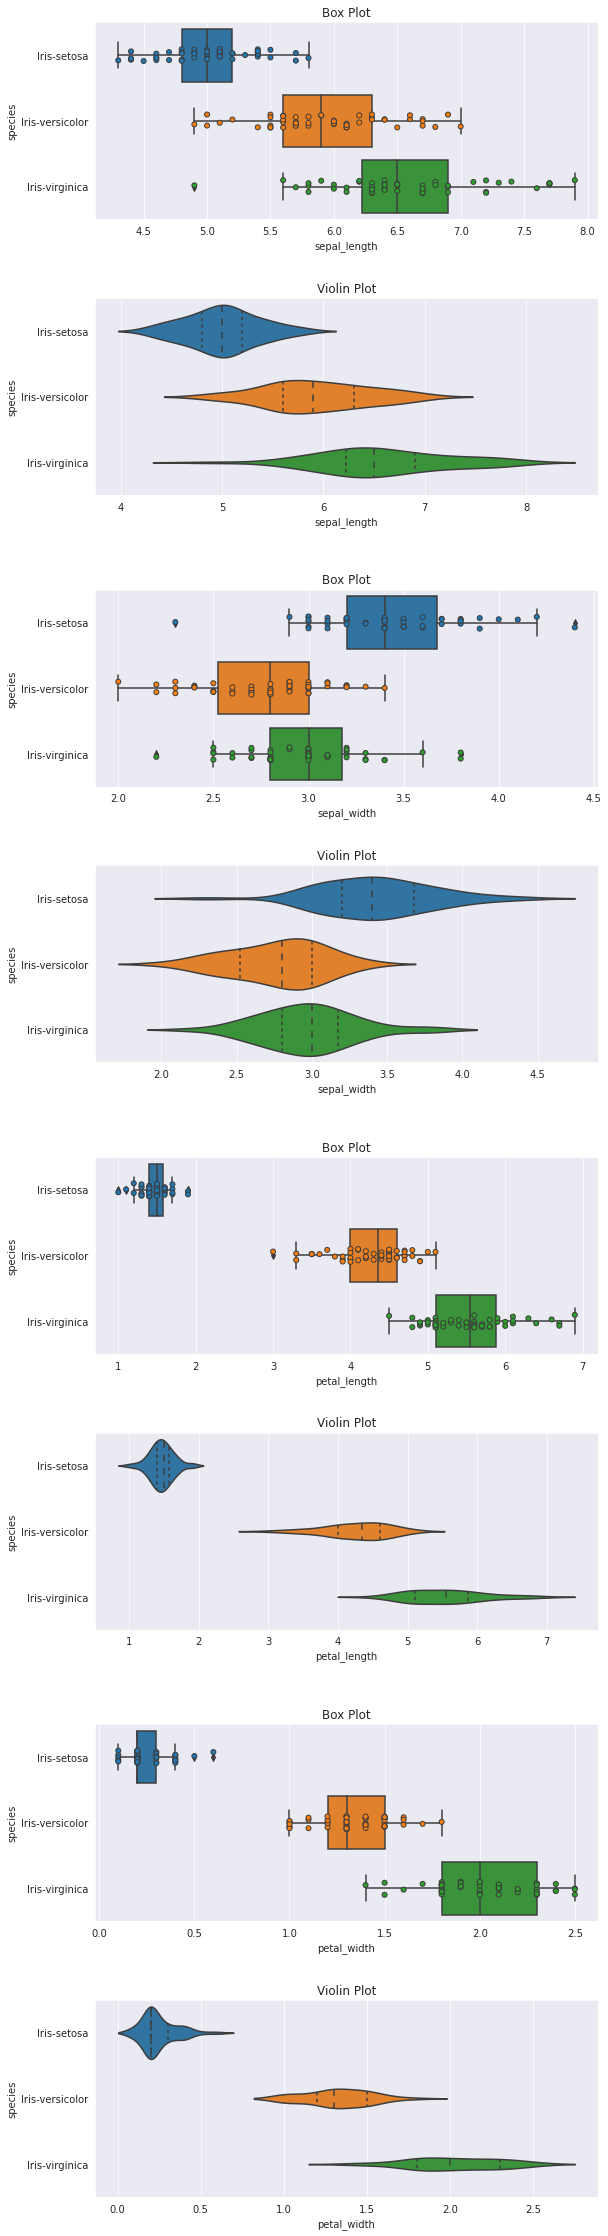

In [13]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(9, 40))
outer = gridspec.GridSpec(4, 1, wspace=0.2, hspace=0.2)

for i, col in enumerate(iris_data.columns[:-1]):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.2, hspace=0.4)

    ax = plt.Subplot(fig, inner[0])
    _ = sns.boxplot(y="species", x=f"{col}", data=iris_data, ax=ax)
    _ = sns.stripplot(y="species", x=f"{col}", data=iris_data,  jitter=True, dodge=True, linewidth=1, ax=ax)
    _ = ax.set_title("Box Plot")
    fig.add_subplot(ax)

    ax = plt.Subplot(fig, inner[1])
    _ = sns.violinplot(y="species", x=f"{col}", data=iris_data, inner='quartile', ax=ax)
    # _ = sns.stripplot(x="species", y="petal_length", data=iris_data, jitter=True, dodge=True, linewidth=1, ax=ax)
    _ = ax.set_title("Violin Plot")
    fig.add_subplot(ax)
fig.show()


Why and iterpretation of Box plot for petal length

* Using distplot although we can get the idea of the mean and spread of the data, it's quite difficult to interpret what is the 75th percentile value. This is where Box and whisker plots come in.
* A box and whisker plot—also called a box plot — displays the five-number summary of a set of data. 
* The five-number summary is the minimum, first quartile, median, third quartile, and maximum.
* In a box plot, we draw a box from the first quartile to the third quartile. 
* A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.
* In seaborn whisker represent the **1.5 x IQR**.
* Most of the points will lie within the whiskers.
* In a single plot we can clearly see the mean, spread of petal length and gather information about the outliers plus the quartile values.
* We can see that if we create a simple if-else rule for vesicolor such as if we set petal_length range between **2 and 5** to be classified as versicolor we can immediately see **5** value overlaps with the 25th percentile for virginica i.e. 25% of points are below 5 so we we'll have 25% error due to the rule.


Violin Plots
* [youtube](https://www.youtube.com/watch?v=M6Nu59Fsyyw)
* [geeksforgeeks](https://www.geeksforgeeks.org/violin-plot-for-data-analysis/)
* A vilon plot combines the benefits of the **histograms or PDf and Box Plot** and simpliflies them.
* Denser regions of the data are fatter and sparser ones are thinner in a violin plot

```python
plt.figure(figsize=(15,10))    
for i, j in enumerate(iris_data.columns[:-1], 1):
    plt.subplot(2, 2, i)
    _ = sns.boxplot(x="species", y=f"{j}", data=iris_data)
    _ = sns.stripplot(x="species", y=f"{j}", data=iris_data,  jitter=True, dodge=True, linewidth=1)
    _ = plt.title("Box Plot")    

plt.figure(figsize=(15,10))    
for i, j in enumerate(iris_data.columns[:-1], 1):
    plt.subplot(2, 2, i)
    _ = sns.violinplot(y="species", x=f"{col}", data=iris_data, inner='quartile')
    # _ = sns.stripplot(x="species", y="petal_length", data=iris_data, jitter=True, dodge=True, linewidth=1, ax=ax)
    _ = plt.title("Violin Plot")
plt.tight_layout(pad=2)
```

In [0]:
# experimenting

def simple_rule(subset):
    cls = []
    for idx, row in subset.iterrows():
        if row['petal_length'] <= 2:
            cls.append("Iris-setosa")
        elif row['petal_length'] > 2 and row['petal_length'] <=4.6:
            cls.append("Iris-versicolor")
        else:
            cls.append("Iris-virginica")
    # accuracy
    cls = np.array(cls)
        
    return accuracy_score(cls, subset.species.values)

In [15]:
iris_data.sample(frac=1)

random_idx = np.random.choice(range(0, 150), 20)
simple_rule(iris_data.sample(frac=1).iloc[random_idx])

0.95

## Bivariate analysis

**Correlation plot**
* we can clearly see that the sepal_length have high +ve correlation with petal_length and petal_width
* Similary petal_length and petal_width have high +ve correlation.
* Later we'll see how to use PCA to reduce the number of dimension and still get good results

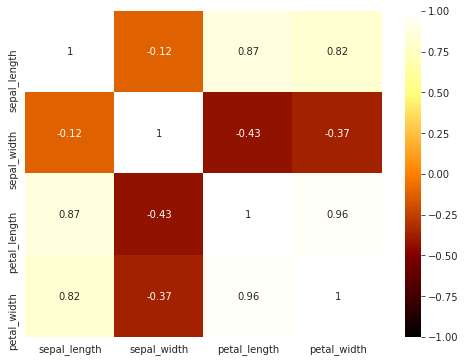

In [16]:
plt.figure(figsize=(8, 6))
_ = sns.heatmap(iris_data.corr(), vmin=-1, vmax=1, annot=True, cmap='afmhot')

**Scatter plot**

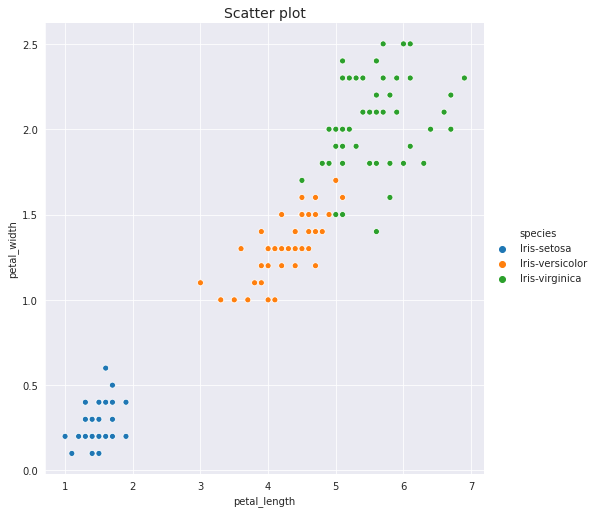

In [17]:
_ = sns.relplot(x='petal_length', y='petal_width', hue='species', data=iris_data, height=7)
_ = plt.title("Scatter plot", fontsize=14)

```python
g = sns.jointplot(x="sepal_length", y="petal_width", data=iris_data, kind="kde")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Sepal$ $length$", "$Petal$ $width$");

p = sns.jointplot(x="sepal_length", y="petal_length", data=iris_data, kind="kde")
p.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
p.ax_joint.collections[0].set_alpha(0)
p.set_axis_labels("$Sepal$ $length$", "$Petal$ $length$");
```

**Pair Plot**

<Figure size 1080x720 with 0 Axes>

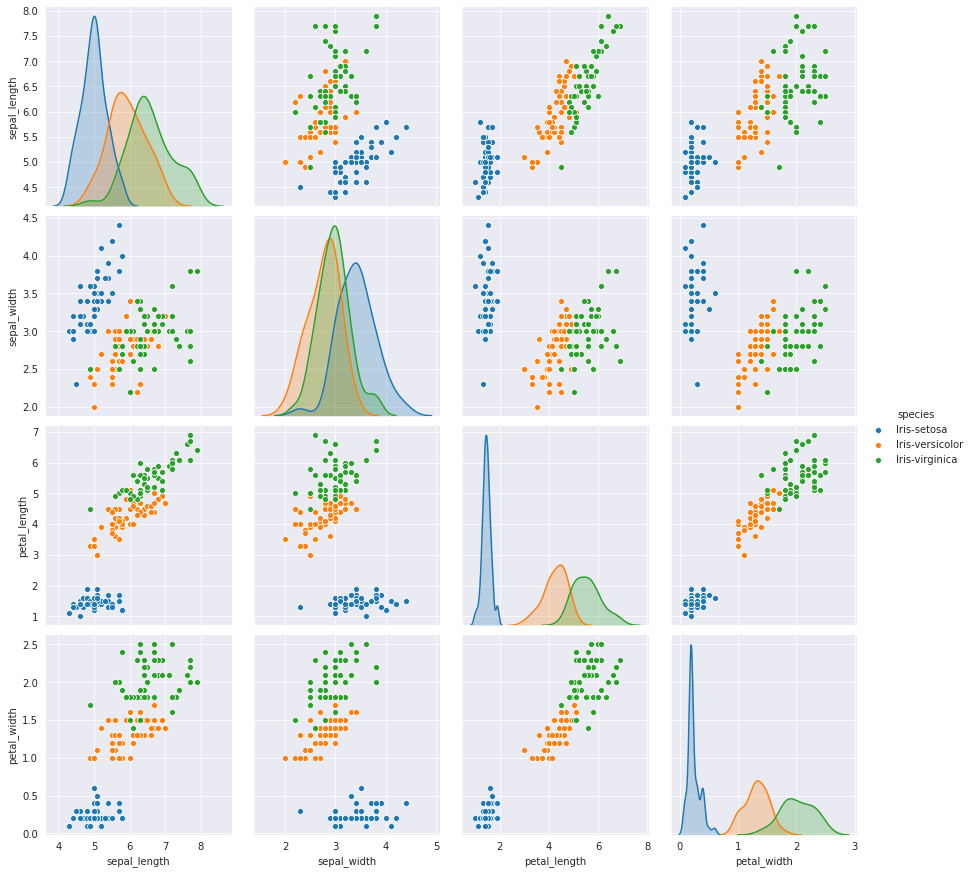

In [18]:
# From the scatterplot we can clearly see that Iris-setosa can be easily identified/linearly seperated using sepal_length and sepal_width
# whereas Iris-versicolor and Iris-virginia have almost the same distribution and rather difficult to seperate


_ = plt.figure(figsize=(15, 10))
_ = sns.pairplot(iris_data, hue="species", height=3, diag_kind="kde")

* From the scatterplot we can clearly see that Iris-setosa can be easily identified/linearly seperated using sepal_length and sepal_width, whereas Iris-versicolor and Iris-virginia have almost the same distribution and rather difficult to seperate.

* Using pairplot we can see that using features *petal_length* or *petal_width*.
    * Setosa can be easily distinguised.
    * Versicolor and Virginica can also be seperated almost linearly from others though there will be a little miss-classification.

* We arrived at the same thing conclusion using distplot

**Countour probablity plot or KDE plot**

Using KDE plots, we get the sense of the distribution of density of the data, KDE Plot is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. 



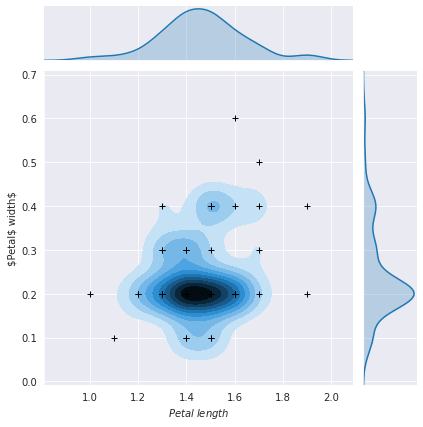

In [19]:
g = sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde")
g.plot_joint(plt.scatter, c="k", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Petal$ $length$", "$Petal$ width$");

From the plot we can see that most of the values for Iris-setosa densely populated near petal_length = 0.19 to 0.24 and petal_width = 1.3 to 1.55.

## Multi-variate analysis

* Using 2-dimensions it's not possible to visualize how Iris-versicolor and Iris-virginica can be seperated. So we can use a 3D plot to visualize this

In [20]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(iris_data, x='petal_length', y='petal_width', z='sepal_length',
                    color='species')
fig.show()

Using a 3D plot we can see that using a little amount of flexibility in the decision boundary we can correctly classify datapoints for Iris-versicolor and Iris-virginica

```python
# using matplotlib
%matplotlib notebook
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')


for i, j in iris_data.groupby("species"):
    temp = j[['sepal_length', 'sepal_width', 'petal_length']]
    ax.scatter(temp['sepal_length'], temp['sepal_width'], \
           temp['petal_length'], s=40, edgecolor='k')

ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")
ax.set_zlabel("petal_length")
plt.title("3D plot to check for seperation")
plt.show()
```

# Model building

## Using sklearn

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.decomposition import PCA

In [22]:
# Seperating X and y
X = iris_data.drop(['species'], axis=1)
y = iris_data['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [0]:
models = []

models.append(("LogisticRegression", LogisticRegression(max_iter=1000)))
models.append(("SVC", SVC(kernel="rbf", gamma=5, C=0.001, max_iter=1000)))

models.append(("KNeighbors", KNeighborsClassifier(n_neighbors=12)))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("RandomForest", RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=10, random_state=42, max_features=None)
models.append(("RandomForest2", rf2))
models.append(('NB', GaussianNB()))
models.append(("MLPClassifier", MLPClassifier(hidden_layer_sizes=(10, 10), solver='adam', max_iter=2000, learning_rate='adaptive', random_state=42)))

In [24]:
# naive feature selection

for i in range(1, 5):
    cols = X.columns[:i]
    X_temp = X[cols].values
    results = []
    names = []
    for name, model in models:
        try:
            result = cross_val_score(model, X[cols], y, cv=5, scoring='accuracy')
        except:
            result = cross_val_score(model, X[cols].reshape(-1, 1), y, cv=5, scoring='accuracy')
        
        names.append(name)
        results.append(result)
    
    print(f"Using features: {cols}")
    
    for i in range(len(names)):
        # f"{'1':0>8}
        print(f"Algo: {names[i]}, Result: {round(results[i].mean(), 2)}")
    print()

Using features: Index(['sepal_length'], dtype='object')
Algo: LogisticRegression, Result: 0.75
Algo: SVC, Result: 0.71
Algo: KNeighbors, Result: 0.68
Algo: DecisionTree, Result: 0.69
Algo: RandomForest, Result: 0.69
Algo: RandomForest2, Result: 0.69
Algo: NB, Result: 0.73
Algo: MLPClassifier, Result: 0.74

Using features: Index(['sepal_length', 'sepal_width'], dtype='object')
Algo: LogisticRegression, Result: 0.81
Algo: SVC, Result: 0.77
Algo: KNeighbors, Result: 0.77
Algo: DecisionTree, Result: 0.71
Algo: RandomForest, Result: 0.73
Algo: RandomForest2, Result: 0.75
Algo: NB, Result: 0.79
Algo: MLPClassifier, Result: 0.79

Using features: Index(['sepal_length', 'sepal_width', 'petal_length'], dtype='object')
Algo: LogisticRegression, Result: 0.95
Algo: SVC, Result: 0.91
Algo: KNeighbors, Result: 0.95
Algo: DecisionTree, Result: 0.91
Algo: RandomForest, Result: 0.93
Algo: RandomForest2, Result: 0.95
Algo: NB, Result: 0.88
Algo: MLPClassifier, Result: 0.96

Using features: Index(['sepal_

We can see that even after using differnt complex models we are still at average 5% off.

Let's try 2 more runs using:
* Only **"petal_length"**.
* Two features **"petal_length" and "petal_width"**. 

As they both provide better seperation between classes as seen during the **EDA**.

In [25]:
single_feature_models = models[:]
single_feature_models.pop(2)
single_feature_models.insert(2, ("KNeighbors", KNeighborsClassifier(n_neighbors=3)))

two_feature_models = models[:]
two_feature_models.pop(2)
two_feature_models.insert(2, ("KNeighbors", KNeighborsClassifier(n_neighbors=5)))

X_selected_1 = X[['petal_length']].values
X_selected_2 = X[['petal_length', 'petal_width']].values

X_ = [X_selected_1, X_selected_2]
y = y.ravel()

mods = [single_feature_models, two_feature_models]
for i in range(2):   
    curr_models = mods[i]
    names = []
    results = []
    for name, mod in curr_models:    
        if i == 0:
            result = cross_val_score(mod, X_selected_1.reshape(-1, 1), y, cv=5, scoring='accuracy')        
        else:
            result = cross_val_score(mod, X_selected_2, y, cv=5, scoring='accuracy')            
        
        names.append(name)
        results.append(result) 

    print(f"Features: {X_[i].shape[1]}")
    for j in range(len(names)):
        print(f"Algo: {names[j]}, Result: {round(results[j].mean(), 2)}")
    print()

Features: 1
Algo: LogisticRegression, Result: 0.95
Algo: SVC, Result: 0.95
Algo: KNeighbors, Result: 0.95
Algo: DecisionTree, Result: 0.92
Algo: RandomForest, Result: 0.92
Algo: RandomForest2, Result: 0.92
Algo: NB, Result: 0.95
Algo: MLPClassifier, Result: 0.95

Features: 2
Algo: LogisticRegression, Result: 0.96
Algo: SVC, Result: 0.96
Algo: KNeighbors, Result: 0.97
Algo: DecisionTree, Result: 0.95
Algo: RandomForest, Result: 0.97
Algo: RandomForest2, Result: 0.96
Algo: NB, Result: 0.96
Algo: MLPClassifier, Result: 0.96



Observations:

* It's not suprising to see that using only one or two features gave almost the same amount accuracy as using all the features. 
* We were only able to do this because of the **EDA** performed earlier.
* EDA helps us understand the data much better than just randomly using models with all the available data.
* Though Iris is a small dataset and performance speed wouldn't have improved much but EDA is really helpful in situations where there are 100 or 1000's of features, we cannot just blindly use all features and hope for the best.
* EDA helps to identify and remove unwanted features.

There are number of other feature selection methods we could try, but that's for another time.
* [sample feature selection NB](https://gist.github.com/veb-101/d747d5841eba9ae9fe51ff9bacddfa42)
* [Comprehensive guide](https://heartbeat.fritz.ai/hands-on-with-feature-selection-techniques-an-introduction-1d8dc6d86c16)

## Using tensorflow

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

In [27]:
# Seperating X and y
X = iris_data.drop(['species'], axis=1)
y = iris_data['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [0]:
x_train, x_val, y_train, y_val = train_test_split(X, y, shuffle=True, stratify=y, 
                                                  random_state=42, test_size=0.1)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.shuffle(150, reshuffle_each_iteration=True)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(32)
val_dataset = val_dataset.shuffle(15, reshuffle_each_iteration=True)

In [0]:
model = Sequential([
                    Input(shape=(4,)),
                    Dense(10, activation='relu'),
                    Dense(10, activation='relu'),
                    Dense(3, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])
history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=0)

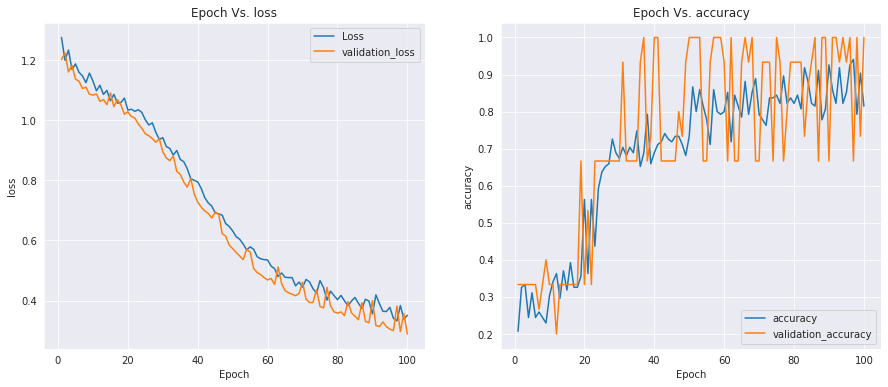

In [30]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 101), history.history['loss'], label="Loss")
plt.plot(range(1, 101), history.history['val_loss'], label="validation_loss")
plt.legend()
plt.title("Epoch Vs. loss")
plt.xlabel("Epoch")
plt.ylabel("loss")

plt.subplot(1, 2, 2)
plt.plot(range(1, 101), history.history['accuracy'], label="accuracy")
plt.plot(range(1, 101), history.history['val_accuracy'], label="validation_accuracy")
plt.legend()
plt.title("Epoch Vs. accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")

plt.show()

## Feature Extraction using PCA
* Reducing the number of features

In [31]:
# Seperating X and y
X = iris_data.drop(['species'], axis=1)
y = iris_data['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [32]:
pca = PCA(n_components=0.95)
X_transformed = pca.fit_transform(X)
print(X_transformed.shape)
print(pca.n_components_)
print(pca.explained_variance_ratio_)

(150, 2)
2
[0.92461872 0.05306648]


In [33]:
x_train, x_val, y_train, y_val = train_test_split(X_transformed, y, shuffle=True, stratify=y, test_size=0.1)

log = LogisticRegression(max_iter=500)
log.fit(x_train, y_train)
pred = log.predict(x_val)
accuracy_score(y_val, pred)

1.0

# Results
* During the univariate analysis we wrote a simple if-else rule of petal_length and got almost 95% accuracy.
* A simple if-else was on par with complex machine learning algorithms such as Logistic Regression, KNNneighbors, SVM, Gaussian Naive Bayes, Decision Tree, Random forests and MLP's
* Feature extraction and feature selection methods can be further used to produce rich set of features for the models.

# Conclusion
* Always perform EDA to have a better understanding of the data
* Always make note about different analysis or obervations you come across while exploring the data
* Visualization can help to better understand various statistic and information about the data. They can be used to easily convey the relevant information about the data to others.
* Start with simple approach and make a baseline accuracy measure that all rules and models are atleast able to achieve, then start building more complex from.